In [ ]:
# ================================================
# Pakistan Currency Note Detector – CEP Project
# ================================================

# 👤 Team Members:
# Abubakar Yasir – CUI/fa22-bce-075 /LHR
# Muhammad Awais Khizar – CUI/fa22-bce-048 /LHR

# 🎓 Supervised by:
# Sir Abu Bakar Talha Jalil

# 📚 Course:
# Artificial Intelligence – CEP Project

# ✨ Project Goal:
# To classify Pakistani currency notes by denomination using deep learning.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import random

random.seed(42)

# Update these paths based on your actual Drive structure
source_dir = '/content/drive/MyDrive/data-rescaled'
target_base = '/content/drive/MyDrive/pakistani_currency_dataset_split'

# Class folders
classes = ['10_front', '20_front', '50_front', '100_front', '500_front', '1000_front', '5000_front']

# New class labels for simplified folder structure (optional, or keep original if preferred)
classes_map = {cls: cls.replace('_front', '') for cls in classes}

# Split ratios
train_split = 0.7
val_split = 0.15
test_split = 0.15

# Create folder structure
for split in ['train', 'val', 'test']:
    for cls in classes:
        new_cls = classes_map[cls]
        os.makedirs(os.path.join(target_base, split, new_cls), exist_ok=True)

# Split and copy
for cls in classes:
    cls_path = os.path.join(source_dir, cls)
    new_cls = classes_map[cls]

    images = [img for img in os.listdir(cls_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    train_end = int(train_split * len(images))
    val_end = train_end + int(val_split * len(images))

    splits = {
        'train': images[:train_end],
        'val': images[train_end:val_end],
        'test': images[val_end:]
    }

    for split, split_imgs in splits.items():
        for img in split_imgs:
            src = os.path.join(cls_path, img)
            dst = os.path.join(target_base, split, new_cls, img)
            shutil.copyfile(src, dst)

print("✅ Data split into train/val/test")


✅ Data split into train/val/test


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define your base path
base_path = '/content/drive/MyDrive/pakistani_currency_dataset_split'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Training data
training_set = train_datagen.flow_from_directory(
    os.path.join(base_path, 'train'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Validation data
validation_set = val_test_datagen.flow_from_directory(
    os.path.join(base_path, 'val'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)

# Test data (optional, for final testing)
test_set = val_test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 4198 images belonging to 7 classes.
Found 665 images belonging to 7 classes.
Found 677 images belonging to 7 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# CNN model
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(training_set.num_classes, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('/content/drive/MyDrive/best_currency_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

# Training
history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=25,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


KeyboardInterrupt: 

Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 651s 5s/step - accuracy: 0.1698 - loss: 1.9313 - val_accuracy: 0.2812 - val_loss: 1.7441
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 66s 503ms/step - accuracy: 0.2833 - loss: 1.7342 - val_accuracy: 0.3053 - val_loss: 1.6442
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 415ms/step - accuracy: 0.3880 - loss: 1.5974 - val_accuracy: 0.4857 - val_loss: 1.3554
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 56s 422ms/step - accuracy: 0.4573 - loss: 1.3973 - val_accuracy: 0.4511 - val_loss: 1.4197
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 54s 406ms/step - accuracy: 0.5381 - loss: 1.2390 - val_accuracy: 0.5143 - val_loss: 1.2931
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 54s 408ms/step - accuracy: 0.5833 - loss: 1.1308 - val_accuracy: 0.6526 - val_loss: 0.9959
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 53s 401ms/step - accuracy: 0.6544 - loss: 0.9751 - val_accuracy: 0.5955 - val_loss: 1.1555
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 58s 437ms/step - accuracy: 0.6831 - loss: 0.9

In [ ]:
history=cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=25
)

Epoch 1/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 58s 440ms/step - accuracy: 0.9120 - loss: 0.2656 - val_accuracy: 0.8857 - val_loss: 0.4097
Epoch 2/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 418ms/step - accuracy: 0.9200 - loss: 0.2365 - val_accuracy: 0.8887 - val_loss: 0.4054
Epoch 3/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 419ms/step - accuracy: 0.9047 - loss: 0.2629 - val_accuracy: 0.9158 - val_loss: 0.3121
Epoch 4/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 54s 407ms/step - accuracy: 0.9156 - loss: 0.2508 - val_accuracy: 0.9128 - val_loss: 0.3665
Epoch 5/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 416ms/step - accuracy: 0.9308 - loss: 0.2139 - val_accuracy: 0.9053 - val_loss: 0.3500
Epoch 6/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 417ms/step - accuracy: 0.9351 - loss: 0.1918 - val_accuracy: 0.9233 - val_loss: 0.3420
Epoch 7/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 55s 416ms/step - accuracy: 0.9448 - loss: 0.1856 - val_accuracy: 0.9083 - val_loss: 0.3599
Epoch 8/25
132/132 ━━━━━━━━━━━━━━━━━━━━ 54s 408ms/step - accuracy: 0.9373 - loss: 0

In [ ]:
loss, acc = cnn.evaluate(test_set)
print(f"✅ Final Test Accuracy: {acc * 100:.2f}%")


22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step - accuracy: 0.9246 - loss: 0.5215
✅ Final Test Accuracy: 95.42%


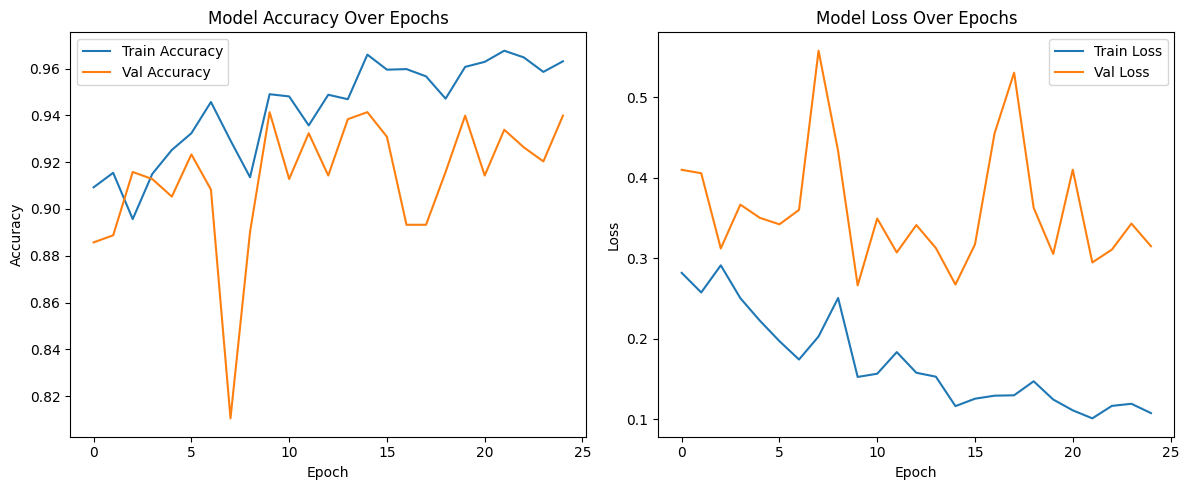

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path from test folder (change this as needed)
img_path = '/content/drive/MyDrive/pakistani_currency_dataset_split/test/20/000_17679021L.jpg'

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

result = cnn.predict(img_array)
predicted_index = np.argmax(result)
class_names = list(training_set.class_indices.keys())

print("Predicted Class:", class_names[predicted_index])


NameError: name 'cnn' is not defined

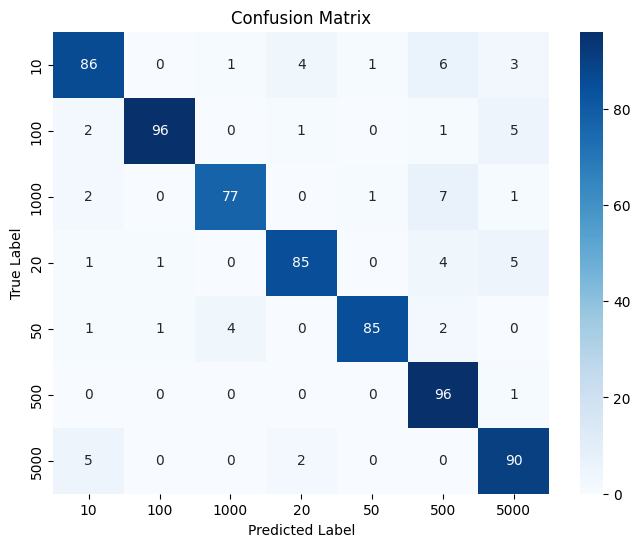

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(test_set.class_indices.keys())

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Make sure test_set is defined like this (with shuffle=False for correct order)
test_set = val_test_datagen.flow_from_directory(
    os.path.join(base_path, 'test'),
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important!
)

# Predict on test data
Y_pred = cnn.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# True labels
y_true = test_set.classes

# Class names
class_names = list(test_set.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))


Found 677 images belonging to 7 classes.
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step
              precision    recall  f1-score   support

          10       0.95      0.86      0.90       101
         100       0.99      0.96      0.98       105
        1000       0.96      0.98      0.97        88
          20       0.96      0.97      0.96        96
          50       0.96      0.97      0.96        93
         500       0.93      1.00      0.97        97
        5000       0.94      0.95      0.94        97

    accuracy                           0.95       677
   macro avg       0.95      0.96      0.95       677
weighted avg       0.95      0.95      0.95       677

